In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple

In [20]:
matplotlib.rcParams['font.family'] = "serif"
matplotlib.rcParams['font.sans-serif'] = "Times New Roman"
matplotlib.rcParams['font.size'] = 12

AttributeError: 'NoneType' object has no attribute 'create_artists'

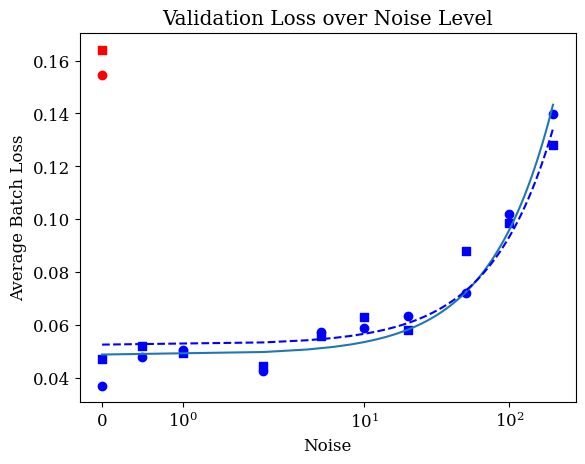

In [31]:
results300 = pd.read_csv("../data/features/ASE_noise/300_reconstruction_results.csv")
direct300 = results300[results300["detection_type"] == "Direct Detection"]
qpms300 = results300[results300["detection_type"] == "QPMS"]
results100 = pd.read_csv("../data/features/ASE_noise/100_reconstruction_results.csv")
direct100 = results100[results100["detection_type"] == "Direct Detection"]
qpms100 = results100[results100["detection_type"] == "QPMS"]

x_fitted = np.linspace(np.min(results300["noise"]), np.max(results300["noise"]), 100)

scatter_q300 = plt.scatter(qpms300["noise"], qpms300["val_loss"], color='b')
scaterr_q100 = plt.scatter(qpms100["noise"], qpms100["val_loss"], color='b', marker='s')
scatter_d300 = plt.scatter(direct300["noise"], direct300["val_loss"], color='r')
scatter_d100 = plt.scatter(direct100["noise"], direct100["val_loss"], color='r', marker='s')
[a,b] = np.polyfit(qpms300["noise"], qpms300["val_loss"], 1)
y_fitted = a*x_fitted + b
line_q300 = plt.plot(x_fitted, y_fitted)
[a,b] = np.polyfit(qpms100["noise"], qpms100["val_loss"], 1)
y_fitted = a*x_fitted + b
line_q100 = plt.plot(x_fitted, y_fitted, 'b', linestyle='--')
plt.xscale("symlog")
plt.title("Validation Loss over Noise Level")
plt.ylabel("Average Batch Loss")
plt.xlabel("Noise")
plt.legend([(scatter_q300, line_q300), (scaterr_q100, line_q100), scatter_d300, scatter_d100], ['300 Feature QPMS Detection', '100 Feature QPMS Detection', '300 Feature Direct Detection', '100 Feature Direct Detection'])
plt.show()


plt.scatter(qpms300["noise"], qpms300["val_psnr"], color='b', label="300 Feature QPMS Detection")
plt.scatter(qpms100["noise"], qpms100["val_psnr"], color='b', marker='s', label="100 Feature QPMS Detection")
plt.scatter(direct300["noise"], direct300["val_psnr"], color='r', label="300 Feature Direct Detection")
plt.scatter(direct100["noise"], direct100["val_psnr"], color='r', marker='s', label="100 Feature Direct Detection")
[a,b] = np.polyfit(qpms300["noise"], qpms300["val_psnr"], 1)
y_fitted = a*x_fitted + b
plt.plot(x_fitted, y_fitted)
[a,b] = np.polyfit(qpms100["noise"], qpms100["val_psnr"], 1)
y_fitted = a*x_fitted + b
plt.plot(x_fitted, y_fitted, 'b', linestyle='--')
plt.xscale("symlog")
plt.title("Validation PSNR over Noise Level")
plt.ylabel("Average Batch PSNR (dB)")
plt.xlabel("Noise")
plt.legend()
plt.show()


plt.scatter(qpms300["noise"], qpms300["val_ssim"], color='b', label="300 Feature QPMS Detection")
plt.scatter(qpms100["noise"], qpms100["val_ssim"], color='b', marker='s', label="100 Feature QPMS Detection")
plt.scatter(direct300["noise"], direct300["val_ssim"], color='r', label="300 Feature Direct Detection")
plt.scatter(direct100["noise"], direct100["val_ssim"], color='r', marker='s', label="100 Feature Direct Detection")
[a,b] = np.polyfit(qpms300["noise"], qpms300["val_ssim"], 1)
y_fitted = a*x_fitted + b
plt.plot(x_fitted, y_fitted)
[a,b] = np.polyfit(qpms100["noise"], qpms100["val_ssim"], 1)
y_fitted = a*x_fitted + b
plt.plot(x_fitted, y_fitted, 'b', linestyle='--')
plt.xscale("symlog")
plt.title("Validation SSIM over Noise Level")
plt.ylabel("Average Batch SSIM")
plt.xlabel("Noise")
plt.legend()
plt.show()

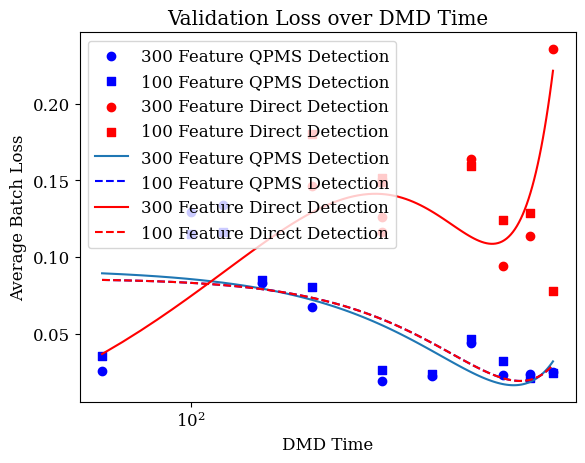

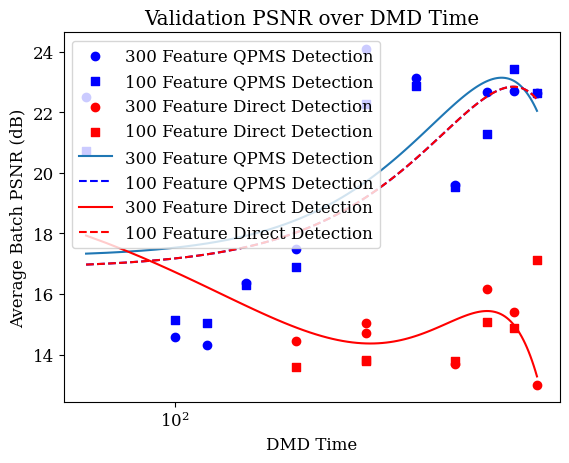

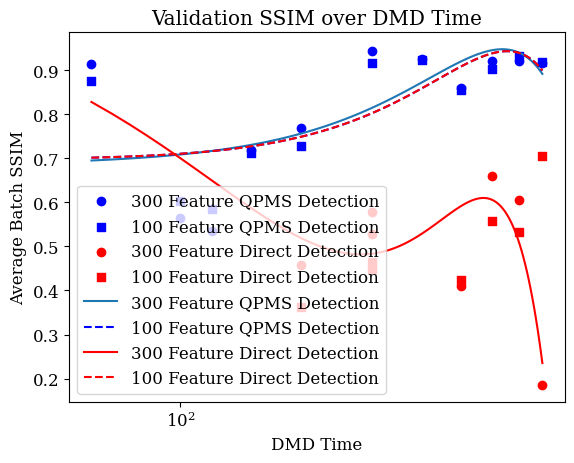

In [27]:
results300 = pd.read_csv("../data/features/integration_time/300_reconstruction_results.csv")
direct300 = results300[results300["detection_type"] == "Direct Detection"]
qpms300 = results300[results300["detection_type"] == "QPMS"]
results100 = pd.read_csv("../data/features/integration_time/100_reconstruction_results.csv")
direct100 = results100[results100["detection_type"] == "Direct Detection"]
qpms100 = results100[results100["detection_type"] == "QPMS"]

x_fitted = np.linspace(np.min(results300["dmd_time"]), np.max(results300["dmd_time"]), 100)

plt.scatter(qpms300["dmd_time"], qpms300["val_loss"], color='b', label="300 Feature QPMS Detection")
plt.scatter(qpms100["dmd_time"], qpms100["val_loss"], color='b', marker='s', label="100 Feature QPMS Detection")
plt.scatter(direct300["dmd_time"], direct300["val_loss"], color='r', label="300 Feature Direct Detection")
plt.scatter(direct100["dmd_time"], direct100["val_loss"], color='r', marker='s', label="100 Feature Direct Detection")
[a,b,c,d] = np.polyfit(qpms300["dmd_time"], qpms300["val_loss"], 3)
y_fitted = a*(x_fitted**3) + b*(x_fitted**2) + c*x_fitted + d
plt.plot(x_fitted, y_fitted, label="300 Feature QPMS Detection")
[a,b,c,d] = np.polyfit(qpms100["dmd_time"], qpms100["val_loss"], 3)
y_fitted = a*(x_fitted**3) + b*(x_fitted**2) + c*x_fitted + d
plt.plot(x_fitted, y_fitted, 'b', linestyle='--', label="100 Feature QPMS Detection")
[a,b,c,d] = np.polyfit(direct300["dmd_time"], direct300["val_loss"], 3)
y_fitted = a*(x_fitted**3) + b*(x_fitted**2) + c*x_fitted + d
plt.plot(x_fitted, y_fitted, 'r', label="300 Feature Direct Detection")
[a,b,c,d] = np.polyfit(qpms100["dmd_time"], qpms100["val_loss"], 3)
y_fitted = a*(x_fitted**3) + b*(x_fitted**2) + c*x_fitted + d
plt.plot(x_fitted, y_fitted, 'r', linestyle='--', label="100 Feature Direct Detection")
plt.xscale("symlog")
plt.title("Validation Loss over DMD Time")
plt.ylabel("Average Batch Loss")
plt.xlabel("DMD Time")
plt.legend()
plt.show()


plt.scatter(qpms300["dmd_time"], qpms300["val_psnr"], color='b', label="300 Feature QPMS Detection")
plt.scatter(qpms100["dmd_time"], qpms100["val_psnr"], color='b', marker='s', label="100 Feature QPMS Detection")
plt.scatter(direct300["dmd_time"], direct300["val_psnr"], color='r', label="300 Feature Direct Detection")
plt.scatter(direct100["dmd_time"], direct100["val_psnr"], color='r', marker='s', label="100 Feature Direct Detection")
[a,b,c,d] = np.polyfit(qpms300["dmd_time"], qpms300["val_psnr"], 3)
y_fitted = a*(x_fitted**3) + b*(x_fitted**2) + c*x_fitted + d
plt.plot(x_fitted, y_fitted, label="300 Feature QPMS Detection")
[a,b,c,d] = np.polyfit(qpms100["dmd_time"], qpms100["val_psnr"], 3)
y_fitted = a*(x_fitted**3) + b*(x_fitted**2) + c*x_fitted + d
plt.plot(x_fitted, y_fitted, 'b', linestyle='--', label="100 Feature QPMS Detection")
[a,b,c,d] = np.polyfit(direct300["dmd_time"], direct300["val_psnr"], 3)
y_fitted = a*(x_fitted**3) + b*(x_fitted**2) + c*x_fitted + d
plt.plot(x_fitted, y_fitted, 'r', label="300 Feature Direct Detection")
[a,b,c,d] = np.polyfit(qpms100["dmd_time"], qpms100["val_psnr"], 3)
y_fitted = a*(x_fitted**3) + b*(x_fitted**2) + c*x_fitted + d
plt.plot(x_fitted, y_fitted, 'r', linestyle='--', label="100 Feature Direct Detection")
plt.xscale("symlog")
plt.title("Validation PSNR over DMD Time")
plt.ylabel("Average Batch PSNR (dB)")
plt.xlabel("DMD Time")
plt.legend()
plt.show()


plt.scatter(qpms300["dmd_time"], qpms300["val_ssim"], color='b', label="300 Feature QPMS Detection")
plt.scatter(qpms100["dmd_time"], qpms100["val_ssim"], color='b', marker='s', label="100 Feature QPMS Detection")
plt.scatter(direct300["dmd_time"], direct300["val_ssim"], color='r', label="300 Feature Direct Detection")
plt.scatter(direct100["dmd_time"], direct100["val_ssim"], color='r', marker='s', label="100 Feature Direct Detection")
[a,b,c,d] = np.polyfit(qpms300["dmd_time"], qpms300["val_ssim"], 3)
y_fitted = a*(x_fitted**3) + b*(x_fitted**2) + c*x_fitted + d
plt.plot(x_fitted, y_fitted, label="300 Feature QPMS Detection")
[a,b,c,d] = np.polyfit(qpms100["dmd_time"], qpms100["val_ssim"], 3)
y_fitted = a*(x_fitted**3) + b*(x_fitted**2) + c*x_fitted + d
plt.plot(x_fitted, y_fitted, 'b', linestyle='--', label="100 Feature QPMS Detection")
[a,b,c,d] = np.polyfit(direct300["dmd_time"], direct300["val_ssim"], 3)
y_fitted = a*(x_fitted**3) + b*(x_fitted**2) + c*x_fitted + d
plt.plot(x_fitted, y_fitted, 'r', label="300 Feature Direct Detection")
[a,b,c,d] = np.polyfit(qpms100["dmd_time"], qpms100["val_ssim"], 3)
y_fitted = a*(x_fitted**3) + b*(x_fitted**2) + c*x_fitted + d
plt.plot(x_fitted, y_fitted, 'r', linestyle='--', label="100 Feature Direct Detection")
plt.xscale("symlog")
plt.title("Validation SSIM over DMD Time")
plt.ylabel("Average Batch SSIM")
plt.xlabel("DMD Time")
plt.legend()
plt.show()